Original link to the tutorial is here:
https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization

Feature selection in this material with:
1. Correlation 
2. Univariate feature selection
3. Recursive feature elimination
4. Recursive feature elimination with cross validation
5. Tree based feature selection methods 
5. PCA

# Data Analysis


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from subprocess import check_output
# man gotta remember using this to get the directories easily
print(check_output(["ls","../Data Science Techniques/"]).decode("utf8"))

Feature Selection and Data Visualization.ipynb
data.csv



In [2]:
data=pd.read_csv("../Data Science Techniques/data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()
# This is a dataset on breast cancer data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Looking at the column names, here are the basic obs:
1. ID shouldn't be used to train
2. diagnosis is the label
3. There's a weird column named Unnamed:32 that we can drop

we can drop the ones that we don't really need 


In [5]:
col=data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [6]:
# Set up the target column
y=data.diagnosis
list=["Unnamed: 32","id",'diagnosis']
x=data.drop(list,axis=1) # Specifying what to drop using the drop function
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


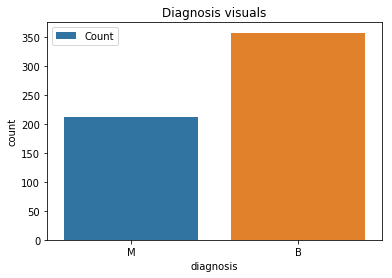

In [7]:
ax=sns.countplot(y,label="Count")
B,M=y.value_counts()
plt.title("Diagnosis visuals")
plt.legend();

In [8]:
y.value_counts()
# B is benign and M is malignant

B    357
M    212
Name: diagnosis, dtype: int64

We have a lot of features but what do they mean?

In [9]:
round(x.describe(),2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


The one key take-away from looking at this is that the numbers by the columns have different set of spreads. If we want to train anything, we'd need to scale them or standardize them.

# Visualization 
in order to visualize data we are going to use seaborn plots that is not used in other kernels.What I use in real life is mostly violin plot and swarm plot. Do not forget we are not selecting feature, we are trying to know data like looking at the drink list at the pub door.
Before violin and swarm plot we need to normalization or standirdization. Because differences between values of features are very high to observe on plot. I plot features in 3 group and each group includes 10 features to observe better.

### Could use subsetting to visualize the spread of the data better 

In [10]:
# first 10 features 
data_dia=y
data=x
data_n_2=(data-data.mean())/(data.std()) # manual standardization
data=pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data=pd.melt(data,id_vars="diagnosis",var_name="features",value_name="value")

In [11]:
data.head()

,diagnosis,features,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233
4,M,radius_mean,1.748758


In [12]:
data.shape

(5690, 3)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

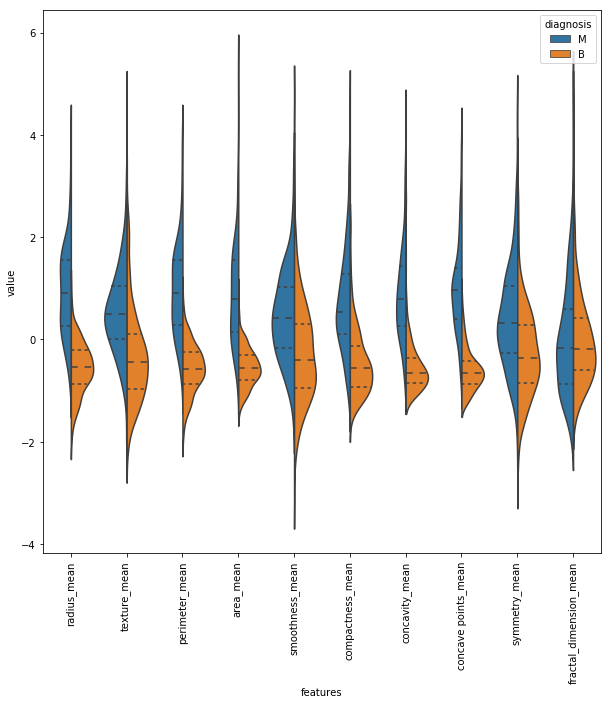

In [13]:
# only after melting the data into the right shape would the visualization make sense
plt.figure(figsize=(10,10))
sns.violinplot(x="features",y="value",hue="diagnosis",data=data,split=True,inner="quart")
# what do split, inner parameters mean? 
# split : bool, optional
# When using hue nesting with a variable that takes two levels, 
# setting split to True will draw half of a violin for each level. 
# This can make it easier to directly compare the distributions.


# inner : {“box”, “quartile”, “point”, “stick”, None}, optional
# Representation of the datapoints in the violin interior. 
# If box, draw a miniature boxplot. If quartiles, 
# draw the quartiles of the distribution. 
# If point or stick, show each underlying datapoint. 
# Using None will draw unadorned violins.
plt.xticks(rotation=90) 

# Sticks show the density plot and it shows how desne the data plots are scattered
# Points are sticks reduced to a single point
# Sticks take a lot longer to draw

# This graph is really useful in displaying the distribution of each var by target variables
# This graph can provide very good intuition of what features are good for and have a high impact on the chart


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

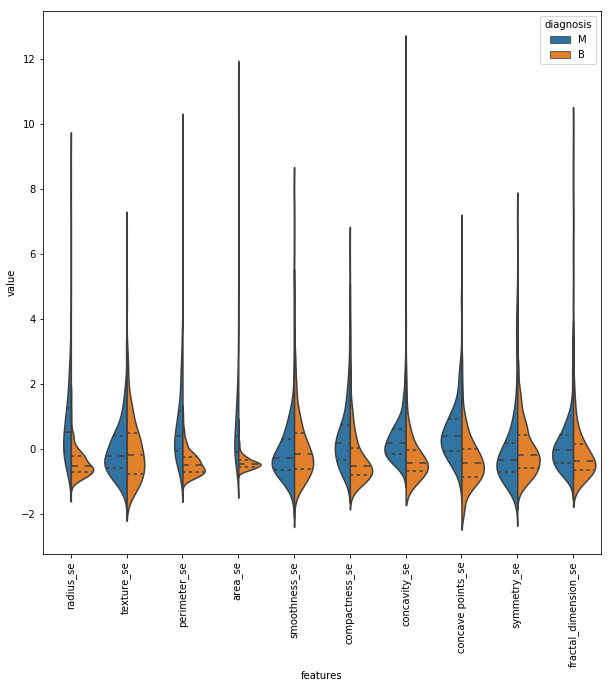

In [14]:
# The next ten features 
data=pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data=pd.melt(data,id_vars="diagnosis",
            var_name="features",
            value_name="value")
# specifying the name of the melted table 
# does this matter? Why do we have to melt the table? Is it possible to just graph without melting?
plt.figure(figsize=(10,10))
sns.violinplot(x="features",y="value",hue="diagnosis",data=data,split=True,inner="quart")
# From the way that this function call is defined, seems that melting is very important
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

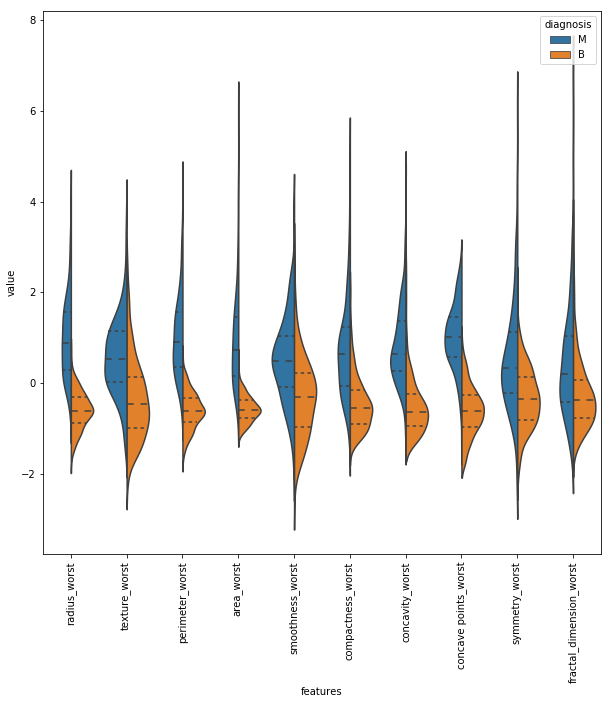

In [16]:
# Applying the same algorithm to analyze 
data=pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data=pd.melt(data,id_vars="diagnosis",
             var_name="features",
             value_name="value")
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

From looking at the graph, it seems that concavity worst and concave points worst are the same. If one feature is correlated with another, we can always just drop them. 

In order to compare two features deeper, joint plot is up for the task. Pearsonr value is correlation value and 1 is the highest. 

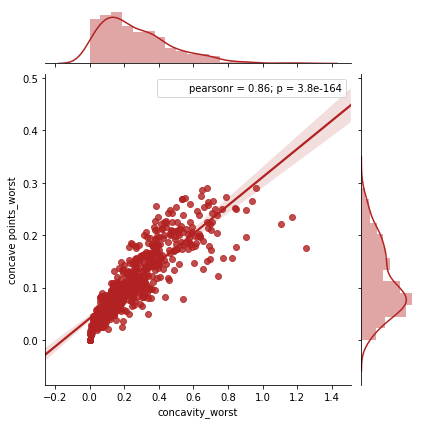

In [18]:
sns.jointplot(x.loc[:,"concavity_worst"],x.loc[:,"concave points_worst"],
              kind='regg',color="firebrick")

# { “scatter” | “reg” | “resid” | “kde” | “hex” }, optional
# Parameters for the kind input. Example to follow

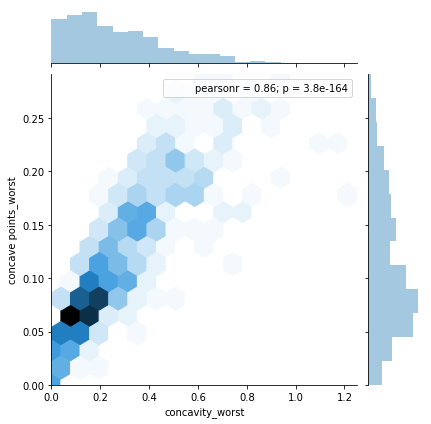

In [20]:
sns.jointplot(x.loc[:,"concavity_worst"],x.loc[:,"concave points_worst"],
             kind="hex");

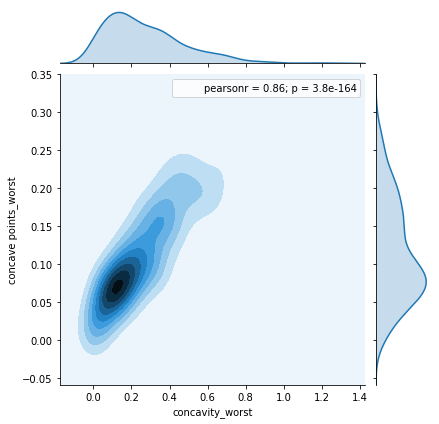

In [21]:
sns.jointplot(x.loc[:,"concavity_worst"],x.loc[:,"concave points_worst"],
             kind="kde");
# KDE is the contour plot

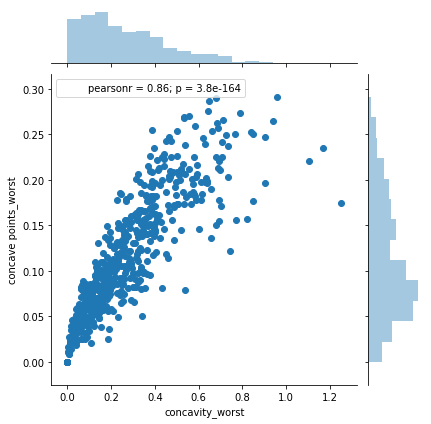

In [22]:
sns.jointplot(x.loc[:,"concavity_worst"],x.loc[:,"concave points_worst"],
             kind="scatter");

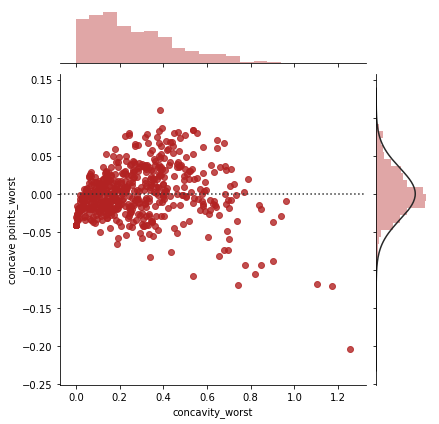

In [24]:
sns.jointplot(x.loc[:,"concavity_worst"],x.loc[:,"concave points_worst"],
             kind="resid",color='firebrick');

# Don't know how to read this plot here

Joint plot is good for a single pair of features but if we want to do more feature comparison. We can use the pair grid plot. 

#### Key note: these type of exploratory analysis can aid efforts of feature selection in feature engineering

/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


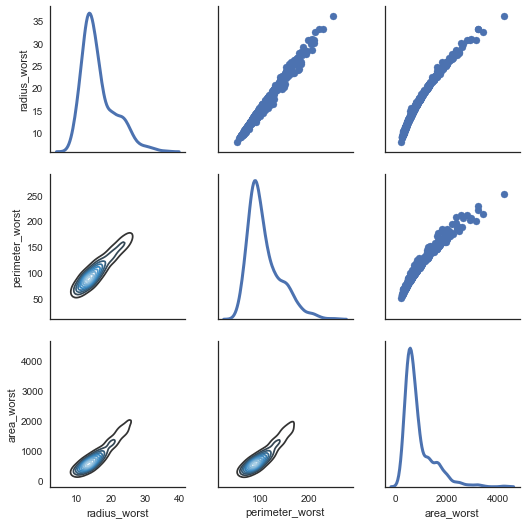

In [27]:
sns.set(style="white")
df=x.loc[:,["radius_worst","perimeter_worst","area_worst"]]
g=sns.PairGrid(df,diag_sharey=False)
g.map_lower(sns.kdeplot,cmap="Blues_d") # yet another way of defining colors
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw=3)

#### Key note here is that seaborn jointplot + PairGrid are both useful 


In swarm plot, the mix and distribution does not make a very complex appearance. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

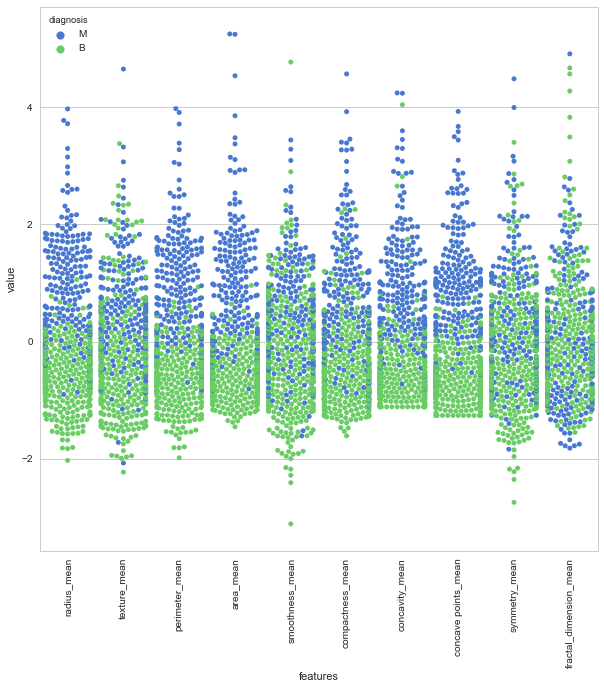

In [37]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
# Man this plot looks so much better than the violin plot
# The y value should be standardized first before plotting in order for this 
# to work appropriately. From a readability standpoint

545.3278391361237

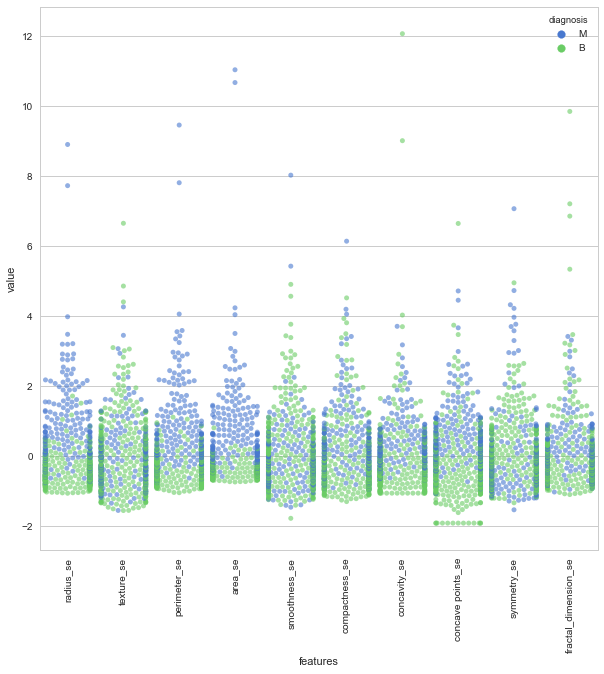

In [46]:
data=pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data=pd.melt(data,id_vars="diagnosis",value_name="value",var_name="features")
plt.figure(figsize=(10,10))
sns.swarmplot(x="features",y="value",hue='diagnosis',data=data,alpha=0.6)
plt.xticks(rotation=90)
toc-tic

#### Key note and take away: the swarm plot, it is imperative to see the clear seperation of features' distribution. If there's a clear seperation, then it means the feature is important in seperating the target var. Although, violin plot's split is very good in looking at relative distribution. 

In [41]:
data.shape 
# Plotting 5000 points takes roughly a second. This is fast but what if there are 
# a ton of data plots. This swarm plot may not be super useful then



(5690, 3)

swarm plot time:  545.3278391361237  ms


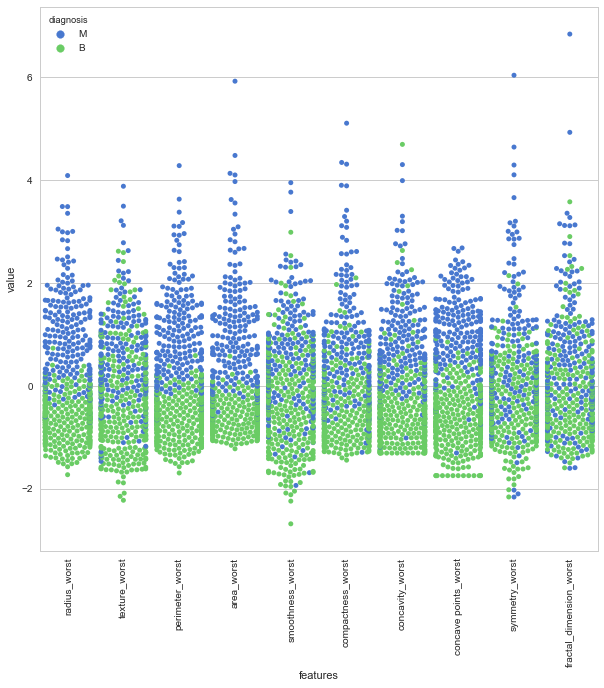

In [45]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," ms")

If we want to observe all correlation between features, then the heatmapt is required for this.

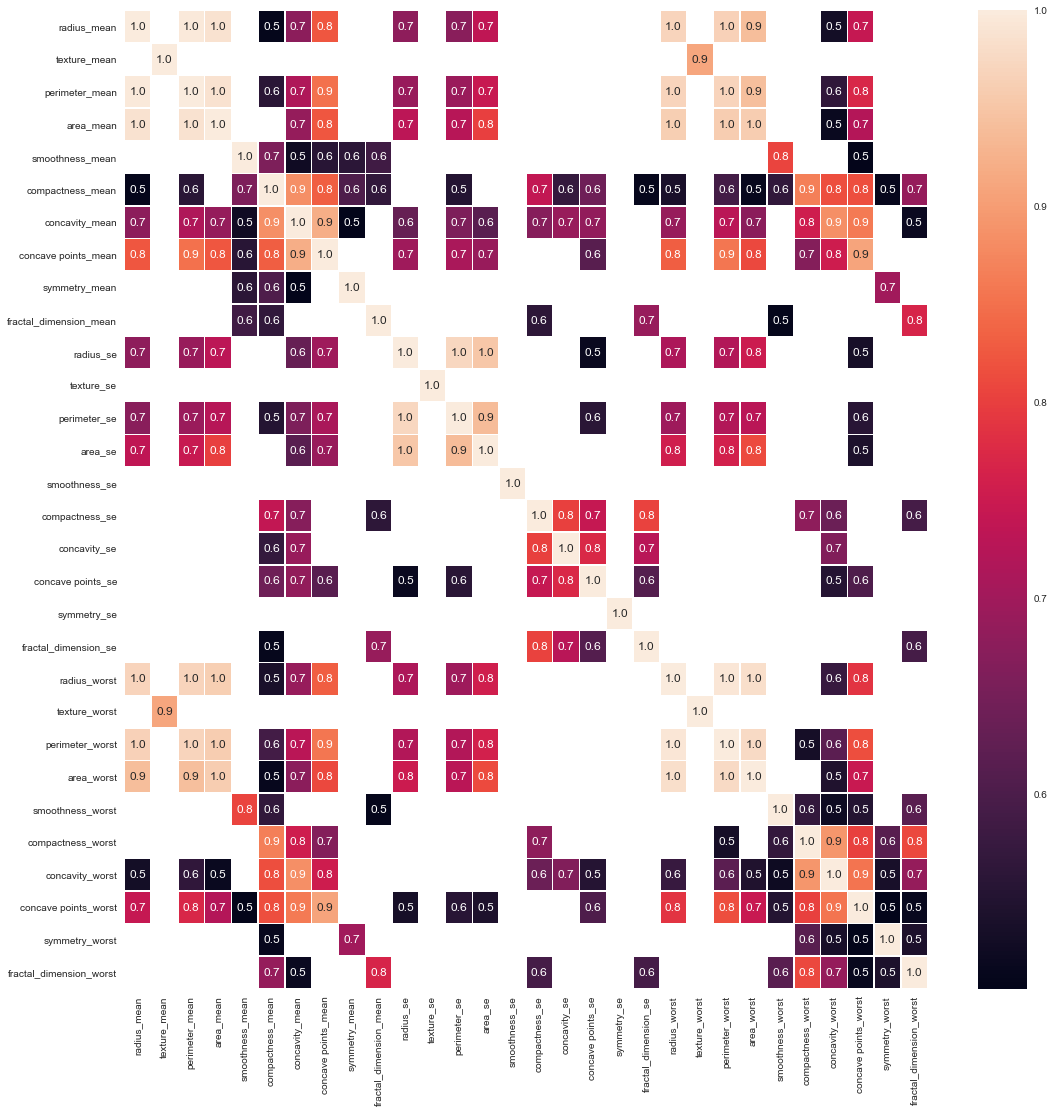

In [52]:
# Correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr()[x.corr()>0.5], annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Feature selection and random forest classification

Feature selection with different methods:
1. Feature selection with correlation
2. Univariate feature selection
3. Recursive feature elimination 
4. Recursive feature elimination with cross validation (RFECV)
5. Tree based feature selection

Random forest classification is used to train the model

## 1) Feature selection with correlation and random forest classification

From the correlation graph, we can identify the features that are correlated with each other. Dropping those that are super correlated.

In [54]:
drop_list1=['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1=x.drop(drop_list1,axis=1)
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


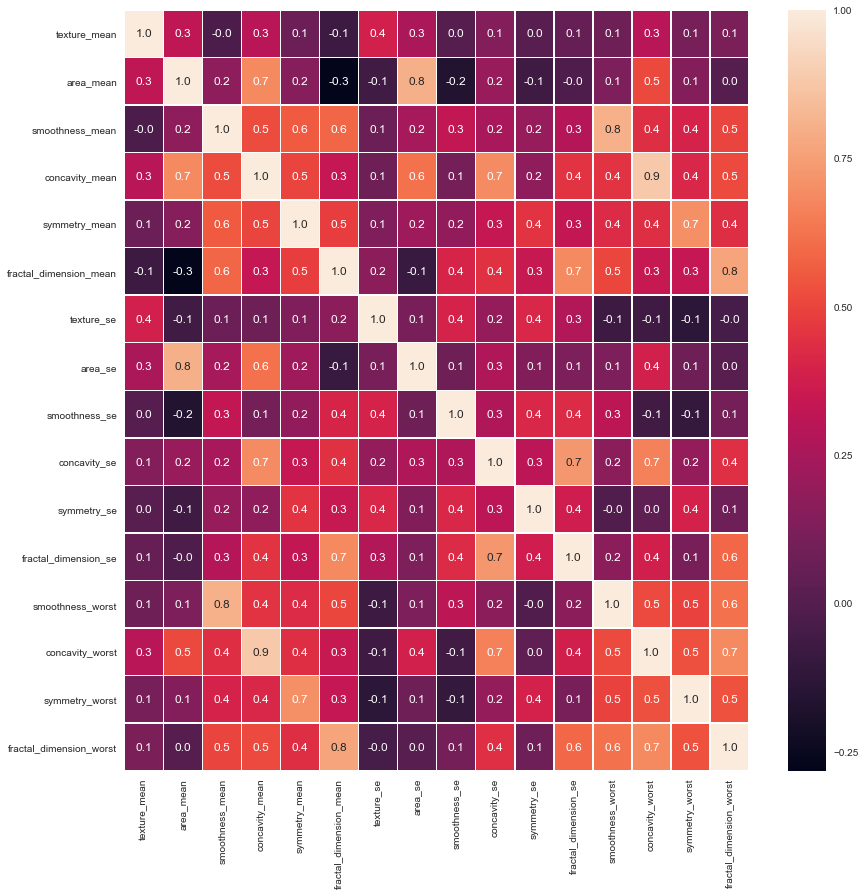

In [62]:
# plotting the heatmap again to see how correlated things are with each other
f,ax=plt.subplots(figsize=(14,14))
sns.heatmap(x_1.corr(),annot=True,linewidths=.5,fmt= ".1f",ax=ax) # This is 1 f not l f damn 1 and l are almost identical;


We have chosen the features here but did we do it correctly? We can use random forest to find accuracy according to chosen features.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score


In [64]:
# split data train 70% and test 30%
x_train,x_test,y_train,y_test=train_test_split(x_1,y,test_size=0.3,random_state=42)


Accuracy is:  0.953216374269


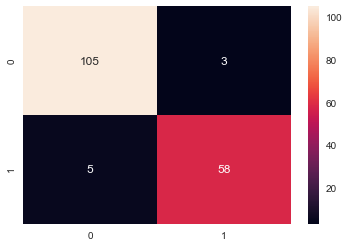

In [66]:
# Random forest classifier with n_estimators=10 (default)
clf_rf=RandomForestClassifier(random_state=43)
clr_rf=clf_rf.fit(x_train,y_train)

ac=accuracy_score(y_test,clf_rf.predict(x_test))
print("Accuracy is: ", ac)
cm=confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d");

This works so well for this matter. Damn, 

# 2 Univeriate feature selection and random forest classification
In univeraite feature selection, we will use SelectKBest that removes all but the k highest scoring features.

This univeriate feature selection we need to choose how many features we will need to use. Should K be 5,10,15? We need to try to see which ones make sense

In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature=SelectKBest(chi2,k=5).fit(x_train,y_train)
# This stores all the features selected right?

In [69]:
print("Score list:",select_feature.scores_)
print("Feature list:",x_train.columns)

Score list: [  6.06916433e+01   3.66899557e+04   1.00015175e-01   1.30547650e+01
   1.95982847e-01   3.42575072e-04   4.07131026e-02   6.12741067e+03
   1.32470372e-03   6.92896719e-01   1.39557806e-03   2.65927071e-03
   2.63226314e-01   2.58858117e+01   1.00635138e+00   1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [74]:
# Train the model to just use these five features 
x_train_2=select_feature.transform(x_train)
x_test_2=select_feature.transform(x_test)
# Random forest with n_estimators 
clf_rf_2=RandomForestClassifier()
clf_rf_2=clf_rf_2.fit(x_train_2,y_train)
ac_2=accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print("Accuracy is",ac_2)
# Damn this is more accurate than correlation based feature selection

Accuracy is 0.959064327485


In [77]:
cm_2=confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
cm_2

array([[104,   4],
       [  3,  60]])

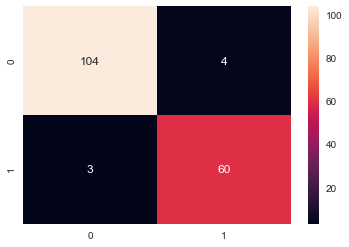

In [78]:
sns.heatmap(cm_2,annot=True,fmt="d")

In [83]:
# Using only 5 features give this 96% accuracy what if we use 10 features?
select_features_10=SelectKBest(chi2,k=10).fit(x_train,y_train)
# Train the model to just use these 10 features
x_train_10=select_features_10.transform(x_train)
x_test_10=select_features_10.transform(x_test)

# Random forest with n_estimators
clf_rf_10=RandomForestClassifier()
clf_rf_10=clf_rf_10.fit(x_train_10,y_train)
ac_10=accuracy_score(y_test,clf_rf_10.predict(x_test_10))
print("Accuracy is",ac_10)
# Man what the heck..... the accuracry score is exactly the same
# Either this method is whacked or the addition of 5 features have no effect what
# so ever

Accuracy is 0.953216374269


# 3 Recursive feature elimination (RFE) with random forest

RFE uses one of the classification methods and assign weights to each of the features. Whose absolute weights are the smallest are pruned from the current set features. The procedure is recursively repeated on the pruned set until the desired number of features.

In [86]:
from sklearn.feature_selection import RFE
# Create the RFE object and rand each pixel?
clf_rf_3=RandomForestClassifier()
rfe=RFE(estimator=clf_rf_3,n_features_to_select=5,step=1)
rfe=rfe.fit(x_train,y_train)
rfe

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
  n_features_to_select=5, step=1, verbose=0)

In [87]:
print("Chosen best 5 features by rfe:",x_train.columns[rfe.support_])

Chosen best 5 features by rfe: Index(['area_mean', 'concavity_mean', 'area_se', 'smoothness_worst',
       'concavity_worst'],
      dtype='object')


# 4 Recursive feature elimination with cross validation and random forest classification
RFECV not only finds the best feature but also tells us how many features we'd need for best accuracy.

In [89]:
from sklearn.feature_selection import RFECV

# The accuracy scoring is proporitional to the number of correct classifications
clf_rf_4=RandomForestClassifier()
rfecv=RFECV(estimator=clf_rf_4,step=1,cv=5,scoring="accuracy") #5 fold cross validation
rfecv=rfecv.fit(x_train,y_train)

print("Optimal number of features: ",rfecv.n_features_)
print("Best features:",x_train.columns[rfecv.support_])

Optimal number of features:  15
Best features: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


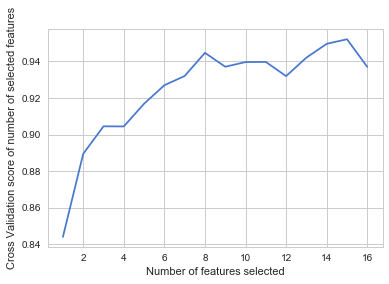

In [90]:
# Plot number of features vs Cross validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross Validation score of number of selected features")
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()

In [92]:
rfecv.grid_scores_
# Don't know a lot of the theory nor characteristics for these sklearn based 
# function calls 

array([ 0.84391026,  0.88942308,  0.90448718,  0.90442308,  0.91685897,
        0.92698718,  0.93205128,  0.94474359,  0.93711538,  0.93967949,
        0.93974359,  0.93198718,  0.94211538,  0.94967949,  0.95217949,
        0.93705128])

# 5 Tree based feature selection and random forest classification

In random forest classification method there's a featureimportances attributes that is the feature importances (the higher, the more important the feature). 

To use this feature_importance method, the training data shouldn't be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.

In [93]:
clf_rf_5=RandomForestClassifier()
clr_rf_5=clf_rf_5.fit(x_train,y_train)


In [95]:
importances=clr_rf_5.feature_importances_
importances # I remember seeing this when I did the project but not sure what 
# This is nor do I know how this is actually calculated

array([ 0.06954341,  0.1992452 ,  0.04542304,  0.27610815,  0.00599076,
        0.01392727,  0.01544844,  0.13500222,  0.01490868,  0.0145038 ,
        0.01102223,  0.01563001,  0.0242936 ,  0.08730276,  0.06204622,
        0.00960422])

In [96]:
std=np.std([tree.feature_importances_ for tree in clf_rf.estimators_],axis=0)
std

array([ 0.01367999,  0.19355103,  0.02750305,  0.27479573,  0.01165585,
        0.03794224,  0.00688603,  0.21501618,  0.02446483,  0.11345383,
        0.0191383 ,  0.01162812,  0.02647515,  0.2210979 ,  0.0182419 ,
        0.01857815])

In [112]:
# Print the feature ranking:
indices=np.argsort(importances[::-1])
print("Feature rnaking:")
for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# WTF is an argsort? 

# Perform an indirect sort along the given axis 
# using the algorithm specified by the kind keyword. 
# It returns an array of indices of the same shape as a 
# that index data along the given axis in sorted order.

Feature rnaking:
1. feature 15 (0.276108)
2. feature 14 (0.199245)
3. feature 13 (0.135002)
4. feature 12 (0.087303)
5. feature 11 (0.069543)
6. feature 10 (0.062046)
7. feature 9 (0.045423)
8. feature 8 (0.024294)
9. feature 7 (0.015630)
10. feature 6 (0.015448)
11. feature 5 (0.014909)
12. feature 4 (0.014504)
13. feature 3 (0.013927)
14. feature 2 (0.011022)
15. feature 1 (0.009604)
16. feature 0 (0.005991)


In [113]:
np.argsort(importances[::-1])

array([15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [105]:
importances

array([ 0.06954341,  0.1992452 ,  0.04542304,  0.27610815,  0.00599076,
        0.01392727,  0.01544844,  0.13500222,  0.01490868,  0.0145038 ,
        0.01102223,  0.01563001,  0.0242936 ,  0.08730276,  0.06204622,
        0.00960422])

In [110]:
np.sort(importances)
# seems that argsort returns the indices of the sorted result
importances

array([ 0.00599076,  0.00960422,  0.01102223,  0.01392727,  0.0145038 ,
        0.01490868,  0.01544844,  0.01563001,  0.0242936 ,  0.04542304,
        0.06204622,  0.06954341,  0.08730276,  0.13500222,  0.1992452 ,
        0.27610815])

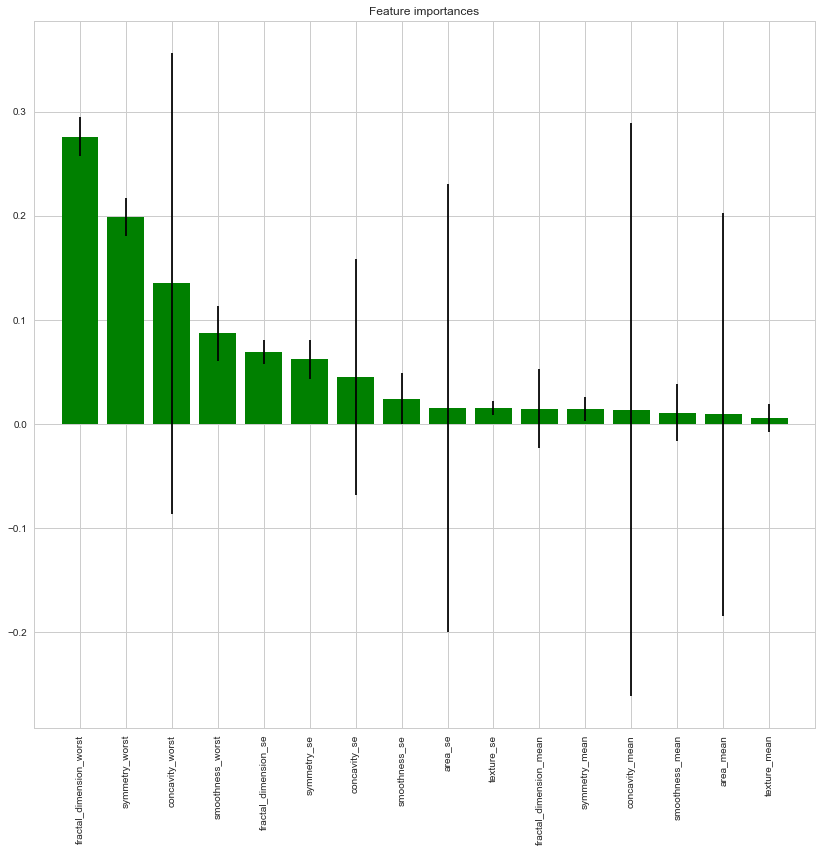

In [116]:
# Plot the feature importances of the forest

plt.figure(1,figsize=(14,13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]),importances[indices],
       color="g",yerr=std[indices],align="center") 
# yerr generates the error bars in the y axis 
plt.xticks(range(x_train.shape[1]),x_train.columns[indices],rotation=90)
plt.xlim([-1,x_train.shape[1]])
plt.show()

# Feature Extraction
Will use the principle component analysis for feature extraction. Before PCA< we'd need to normalize the data for better performances of PCA